In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Main.csv')

In [6]:
df['establishment_category'] = df['establishment_category'].astype('category')

In [7]:
df['inspection_category'] = df['inspection_category'].astype('category')

In [8]:
df['risk_category_factor']=df['risk_category_factor'].astype('category')

In [9]:
df['season_inspection'] = df['season_inspection'].astype('category')

In [10]:
df['year'] = df['year'].astype('category')

# Total Violations

The plot below reveals that total violations peak at 5 to 6 violations per inspection

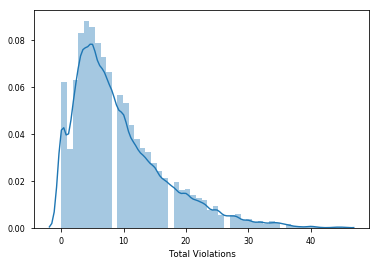

In [18]:
p = sns.distplot(df['total_violations'], hist=True)
p.set(xlabel = "Total Violations")

# Total Violations by Establishment and Risk Categories

The plot below shows that food establishments categorized as others (Commission Merchants, Unknowns, and Unlicensed Food) see a disproportionately high number of Category 5 violations. Compared to other risk categories, Grocery & Food establishments also have a higher number of Category 5 violations. Vending & Cafeteria establishments have no Category 4 or Category 5 violations.

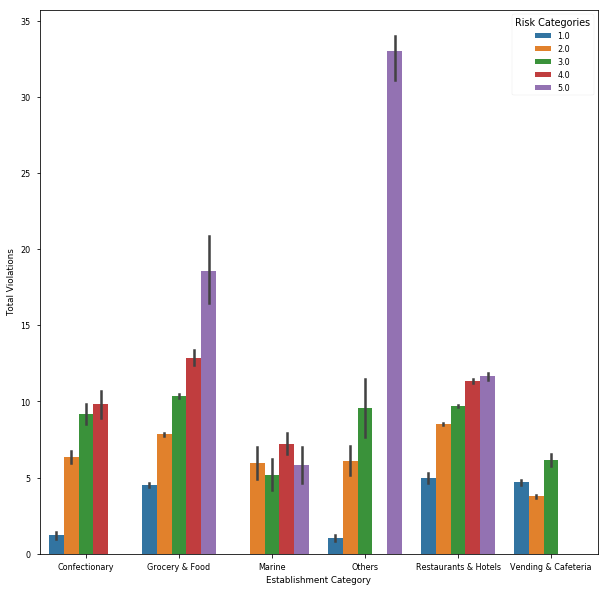

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
p = sns.barplot(x="establishment_category", y = 'total_violations', hue="risk_category_factor", data=df)
p.set(xlabel="Establishment Category", ylabel = "Total Violations")
p.set_xticklabels(labels = ('Confectionary', "Grocery & Food", 'Marine', 'Others', "Restaurants & Hotels",
                            "Vending & Cafeteria"))
p.legend(loc="upper right", title = 'Risk Categories')


 # Critical Violations and Follow Up Inspections
 
The plot below shows that routine and other inspections see a much higher number of total violations as compared to follow up inspections. However, the number of critical violations tend to be higher during follow up inspections as opposed to routine and other inspections. This suggests that during routine and other inspections, inspectors may largely identify obvious issues before digging deeper into critical violations, which are spotted during the follow up inspections

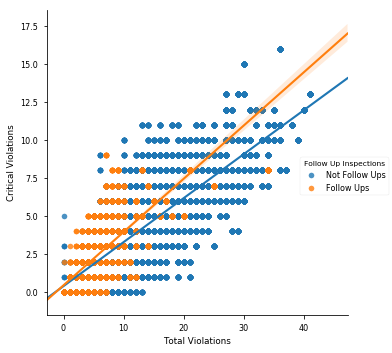

In [21]:
sns.set_context("paper")
p = sns.lmplot('total_violations', 'critical_violations', data = df, hue = 'followup')
p.set(xlabel="Total Violations", ylabel= "Critical Violations")
# legend title
new_title = 'Follow Up Inspections'
p._legend.set_title(new_title)
# replace labels
new_labels = ['Not Follow Ups', 'Follow Ups']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)